In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

کتابخانه‌های موردنیاز را ایمپورت می کنیم

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Adult_TrainDataset.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Data/Adult_TestDataset.csv')
df
data_test


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


دیتاست ترین و تست را میخوانیم و ذخیره می‌کنیم.
هر پیش پردازشی که بر روی داده‌های ترین انجام می دهیم باید بر روی داده‌های تست هم انجام دهیم.
پنج سطر اول و آخر دیتاست نمایش داده شده است

In [ ]:
df['Income'] = df['Income'].replace(['>50K'], 1)
df['Income'] = df['Income'].replace(['<=50K'], 0)
data_test['Income'] = data_test['Income'].replace(['>50K'], 1)
data_test['Income'] = data_test['Income'].replace(['<=50K'], 0)


ستون لیبل را از حالت کتگوری به حالتی عددی و صفر و یک درمی آوریم به طوری که برای درآمد بیشتر از ۵۰ لیبل ۱ و درآمد کمتر مساوی ۵۰ هزار لیبل ۰ را اختصاص می‌دهیم

In [ ]:
df.loc[df['Capital_Gain'] == '?']
df.loc[df['Capital_Loss'] == '?']
df.loc[df.Age == '?']
df.loc[df['Hours-Per-Week'] == '?']
df.loc[df.Sex == '?']
df.loc[df.Race == '?']
df.loc[df.Relationship == '?']
df.loc[df.Marital_Status == '?']

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income


using df.loc for accessing columns.

برای ستون های مختلف چک می‌کنیم که آیا مقدار گمشده

> missing value

دارند ستون‌های بالا مقادیر گمشده ندارند



In [ ]:
df.loc[df.Occupation == '?']
df.loc[df.Work_Class == '?']
df.loc[df.Native_Country== '?']



,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,1
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,0
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,0
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,1


این سه ستون مقادیر از دست رفته دارند چون تعداد مقادیر از دست رفته کم است به کمک مد ،مقادیر را جایگزین می‌کنیم

In [ ]:
df.Native_Country.mode() #-->United-States
df['Native_Country'] = df['Native_Country'].replace(['?'], 'United-States')
data_test['Native_Country'] = data_test['Native_Country'].replace(['?'], 'United-States')
df


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


مقدار مد را با استفاده از دستور پیدا میکنیم و با

> replace

جایگذاری می‌کنیم و برای هر سه ستون به همین شیوه پیش میریم

In [ ]:
df.Occupation.mode() #-->Prof-specialty
df['Occupation'] = df['Occupation'].replace(['?'], 'Prof-specialty')
data_test['Occupation'] = data_test['Occupation'].replace(['?'], 'Prof-specialty')
df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
df.Work_Class.mode() #--> Private
df['Work_Class'] = df['Work_Class'].replace(['?'], 'Private')
data_test['Work_Class'] = data_test['Work_Class'].replace(['?'], 'Private')
df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


بصری سازی داده ها:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final_Weight'}>,
        <Axes: title={'center': 'Education-Number'}>],
       [<Axes: title={'center': 'Capital_Gain'}>,
        <Axes: title={'center': 'Capital_Loss'}>,
        <Axes: title={'center': 'Hours-Per-Week'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >]],
      dtype=object)

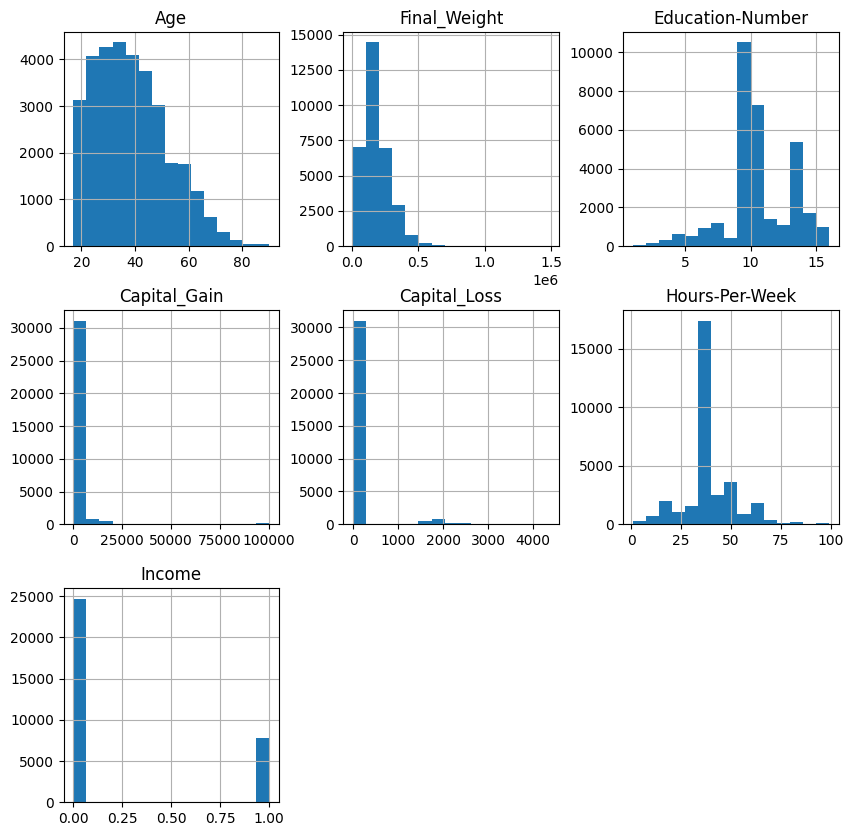

In [ ]:
df.hist( figsize = (10,10),bins = 15)

هیستوگرام نموداری است که بسامد مقادیر را در بازه های متغیر متریک نشان می دهد. این فواصل به عنوان "بین" نامیده می شوند و همه آنها با عرض یکسان هستند.
در اینجا برای هر ستون در دیتاست با مقادیر عددی یک نمودار نسبت داده شده است.
به طور مثال در بررسی نموداری که برای سن داده شده است، نمودار ایکس بیانگر بازه‌های سن افراد و نمودار ایگرگ بسامد آنها را نشان میدهد.
میتوان دید که توزیع داده ها به صورت متقارن نیست و در سمت چپ بیشتر است و هر چه   سن بیشتر میشود بسامد نیز کمتر میشود. این نمودار یک توزیع اج پیک را نشان میدهد  یعنی توزیع قله لبه مانند توزیع نرمال به نظر می رسد با این تفاوت که یک قله بزرگ در یک دم دارد. برای فهمیدن شکل توزیع ها و اینکه یک مجموعه داده مولتی مدال یا بای مدال هست نمودار هیستوگرام بهترین روش است.  همچنین میتوان دید که تعداد افراد با سن  بیشترین 40-45 است. توزیعی که برای ساعتهای هفتگی می باشد یک توزیع متقارن است چرا که هرچه از داده هایی که بین 35 تا 40 فاصله میگیریم کمتر میشوند
در هیستوگرام ها میتوان داده های پرت را نیز به خوبی تشخیص داد. این داده ها به طور یک ستون جداگانه و دور از بقیه نمایش داده می شوند.  در کپیتال گین بیشتر داده ها بین صفر تا 20000 هستند اما یکی از ستون ها نشان  میدهد که داده ای که 100000
باشد نیز داریم. که میتوان آن را داده ی پرت به شمار آورد
یکی از نکاتی که در هیستوگرام باید به آن دقت کرد اینست که برای بدست آوردن توزیع دقیق نیاز داریم که داده هایمان از حداقل مقدار برخوردار باشند و اگر به داده های زیادی دسترسی نداشته باشیم ممکن است که توزیع نادرستی بدست آید.

ادامه بصری سازی:


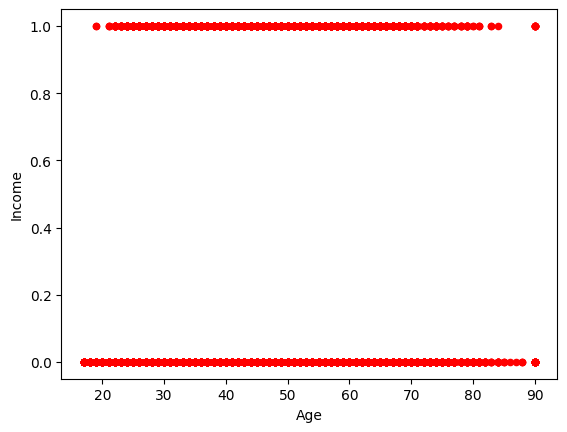

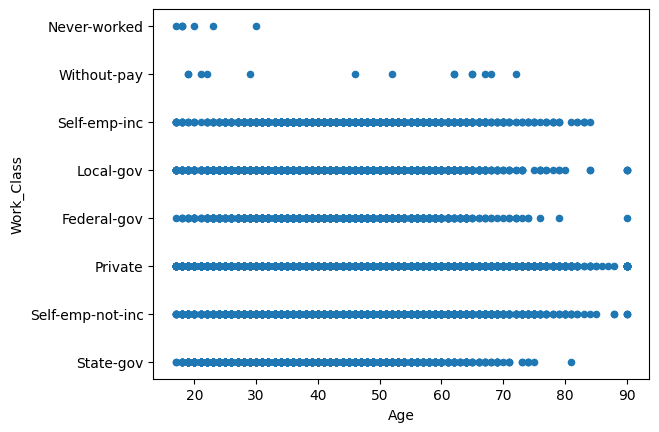

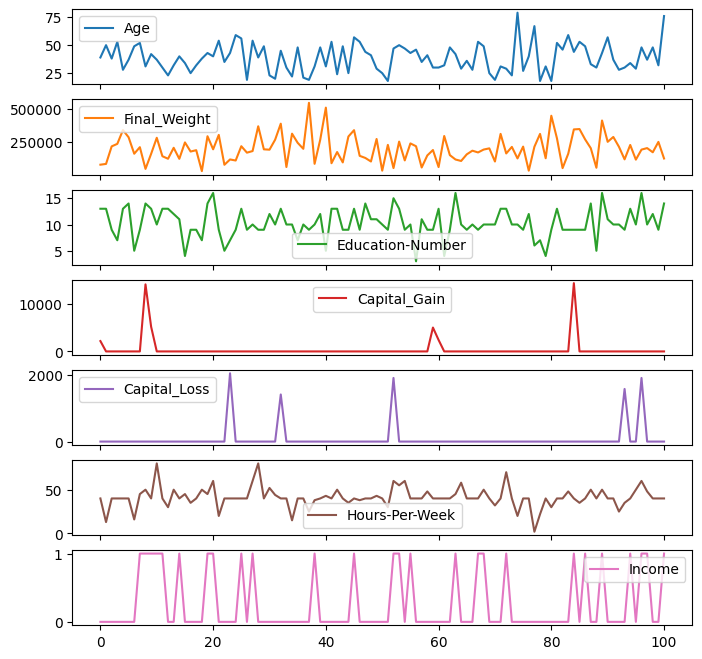

In [ ]:
df.plot.scatter(x = 'Age', y = 'Income', c = 'red');
df.plot.scatter(x='Age', y='Work_Class');
dfs = df.loc[0:100]
dfs.plot(subplots=True, figsize=(8, 8));

scatter plot
یکی از مهم ترین ابزار برای درک روابط بین ویژگی ها هستند و استفاده از آنها به ما دید خوبی میدهد.

در  اینجا میتوان برای درک روابط کدام ویژگی ها نمودار ایکس و ایگرگ را تعیین کرد.
.در نمودار اول درآمد دو حالت دارد و نمودار ایگرگ را به آن اختصاص داده ایم رابطه ای که بین سن و درآمد مشاهده می شود اینست که هرچه سن کمتر و بیشتر میشود درآمد بیشتر از 50000 کمتر است و توزیع در سن های میانی بیشترین حالت را دارد
و در سنین پایین درآمد کمتر از 50000 تا رایج تر است.


در نمودار دوم رابطه ی بین ورک کلس و سن را مشاهده میکنیم. به طور مثال میتوان دید در سنین پایین علیرغم سنین بالاتر کسانی که هیچوقت کار نکرده اند به چشم میخورد و یا در سنین بعد از 75 کارمند دولت کمتر داریم
در حالت کلی هرجا که تراکم داده ها بیشتر باشد ارتباط بین آن دو ویژگی قوی تر است
در نمودار های سکتر داده های پرت را نیز به وضوح میتوان مشاهده کرد

برای اینکه تنها قسمتی از دیتافریم را بصری سازی کنیم میتوانیم تعدادی از سطر ها را به عنوان نمونه بگیریم و ساب پلات را اجرا کنیم. اینکار با اینکه خطا دارد اما میتواند دید نسبتا خوبی برای توزیع داده ها به ما بدهد.  بطور مثال میتوانیم تعداد ساعات کاری هفتگی را ببینیم که مقادیر متفاوتی را میتواند اتخاذ کند و در چه بازه ای قرار میگیرد.

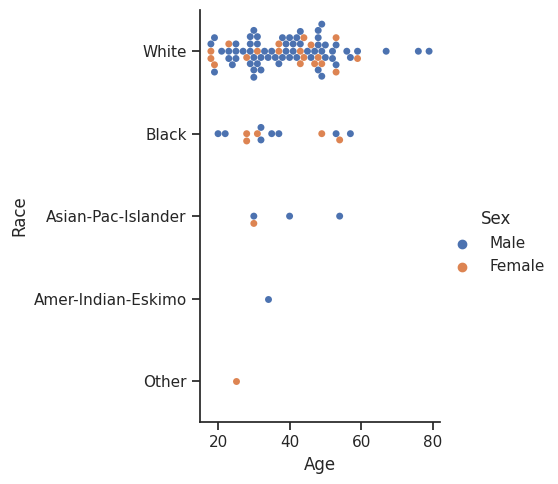

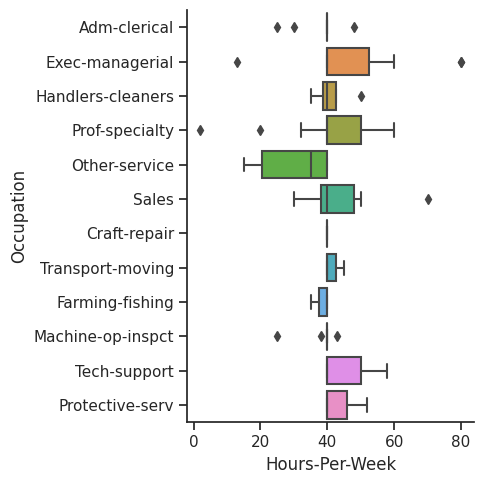

In [ ]:
dfp = df.loc[0:100]
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Age", y="Race", hue="Sex", kind="swarm", data=dfp)
sns.catplot(x="Hours-Per-Week", y="Occupation", kind="box", data=dfp)


با استفاده از کتابخانه ی seaborn

میتوانیم دو نمودار مهم دیگر را بکشیم.

catplot در

میتوان یک نمودار سه بعدی کشید تا روابط سه ویژگی را مشخص کنیم. در اینجا پارامتر جنسیت که دو حالت دارد از طریق تفاوت در رنگ به ما نشان داده میشود.

 همچنین با انتخاب swarm
الگوریتمی اجرا میشود که باعث میشود داده ها با هم همپوشانی نداشته تا بتوان بهتر آن ها را نمایش داد.
هرچند که این ها برای دیتاست های نسبتا کوچک بهتر عمل میکنند بنابراین ما هم تعداد سطر ها را کاهش دادیم تا مشاهده ی بهتری روی این نمودار ها داشته باشیم
برخلاف داده های عددی همیشه مشخص نیست که چگونه ترتیب این داده ها روی محور نمایش داده شوند بنابراین سی بورن سعی میکند این ترتیب را با توجه به دیتاستی که داریم تعیین کند.
در حالاتی که تعداد ویژگی ها زیاد است یا نام آنها طولانی است بهتر است آنها را روی محور عمودی قرار بدهیم.
در اینجا میتوان دید تراکم داده ها در قسمت وایت بیشتر است بنابراین بیشتر داده ها در بازه ی مشخص شده در سنین پایین و سفیدپوست هستند.
در حالت کلی برای نتیجه گرفتن توسط این نمودار باید ببینیم که تراکم داده ها در کجا حداکثر هستند و در کجا داده ی پرت داریم

 boxplot

 باکس پلات سی بورن یک نمونه ساده از نمودار های جعبه ای است که برای بصری سازی توزیع ها استفاده میشود
این نمودار به ما سه چارک توزیع را به همراه نقاط ماکسیمم و مینیمم میدهد.
خطوطی که به موازات جعبه ها امتداد دارند به عنوان "ویسکرز" شناخته می شوند که برای نشان دادن تغییرپذیری در خارج از چارک های بالا و پایین استفاده می شود که تا نقاطی که در فاصله ی 1.5 از دامنه ی میان چارکی قرار دارند کشیده شده اند. همچنین داده هایی که خارج از این بازه ها قرار دارند به طور جداگانه نمایش داده شده اند
این نمودار می‌تواند در مورد وجود داده‌های دورافتاده یا پرت، اطلاعاتی به شما بدهد و مقدار آن‌ها را تعیین کند. همچنین نشان دادن تقارن در داده‌ها از کارهایی این نمودار است.


In [ ]:
df['Capital_Gain'] =( df['Capital_Gain'] - df['Capital_Gain'].mean() ) / df['Capital_Gain'].std()
df['Capital_Loss'] =( df['Capital_Loss'] - df['Capital_Loss'].mean() ) / df['Capital_Loss'].std()
data_test['Capital_Gain'] =( data_test['Capital_Gain'] - data_test['Capital_Gain'].mean() ) / data_test['Capital_Gain'].std()
data_test['Capital_Loss'] =( data_test['Capital_Loss'] - data_test['Capital_Loss'].mean() ) / data_test['Capital_Loss'].std()
df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.148451,-0.216656,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145918,-0.216656,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145918,-0.216656,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145918,-0.216656,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145918,-0.216656,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145918,-0.216656,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145918,-0.216656,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.145918,-0.216656,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.145918,-0.216656,20,United-States,0


برای دو ستون

> Capital_Loss،Capital_Gain

استانداردسازی انجام می‌دهیم



In [ ]:
categ = ['Education','Native_Country']

# Encode
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)
print(df)
categ2 = ['Education','Native_Country']
data_test[categ2] = data_test[categ2].apply(le.fit_transform)
print(data_test)



       Age        Work_Class  Final_Weight  Education  Education-Number  \
0       39         State-gov         77516          9                13   
1       50  Self-emp-not-inc         83311          9                13   
2       38           Private        215646         11                 9   
3       53           Private        234721          1                 7   
4       28           Private        338409          9                13   
...    ...               ...           ...        ...               ...   
32556   27           Private        257302          7                12   
32557   40           Private        154374         11                 9   
32558   58           Private        151910         11                 9   
32559   22           Private        201490         11                 9   
32560   52      Self-emp-inc        287927         11                 9   

           Marital_Status         Occupation   Relationship   Race     Sex  \
0           Never-mar

In [ ]:
ohe = OneHotEncoder()
categorical_cols = [ 'Marital_Status', 'Occupation',
       'Relationship','Race', 'Sex', 'Work_Class']
feature_arry = ohe.fit_transform(df[categorical_cols]).toarray()
feature_labels = ohe.categories_
feature_labels = np.hstack(feature_labels)

features=pd.DataFrame(feature_arry,columns=feature_labels)

df = pd.concat([df, features], axis=1)
df = df.drop(['Marital_Status', 'Occupation',
       'Relationship','Race', 'Sex', 'Work_Class'], axis=1)
print(df)


#data_test
categorical_cols2 = [ 'Marital_Status', 'Occupation',
       'Relationship','Race', 'Sex', 'Work_Class']
feature_arry2 = ohe.fit_transform(data_test[categorical_cols2]).toarray()
feature_labels2 = ohe.categories_
feature_labels2 = np.hstack(feature_labels2)

features2=pd.DataFrame(feature_arry2,columns=feature_labels2)

data_test = pd.concat([data_test, features2], axis=1)
data_test = data_test.drop(['Marital_Status', 'Occupation',
       'Relationship','Race', 'Sex', 'Work_Class'], axis=1)
print(data_test)





       Age  Final_Weight  Education  Education-Number  Capital_Gain  \
0       39         77516          9                13      0.148451   
1       50         83311          9                13     -0.145918   
2       38        215646         11                 9     -0.145918   
3       53        234721          1                 7     -0.145918   
4       28        338409          9                13     -0.145918   
...    ...           ...        ...               ...           ...   
32556   27        257302          7                12     -0.145918   
32557   40        154374         11                 9     -0.145918   
32558   58        151910         11                 9     -0.145918   
32559   22        201490         11                 9     -0.145918   
32560   52        287927         11                 9      1.888395   

       Capital_Loss  Hours-Per-Week  Native_Country  Income  Divorced  ...  \
0         -0.216656              40              38       0       0.0

برای استفاده از داده های کتگوریکال باید آن ها را به داده های عددی تبدیل کنیم تا عملیاتی که میخواهیم روی آنها بتوان انجام داد از این رو از اینکدینگ استفاده میشود.

Label Encoding: Assign each categorical value an integer value based on alphabetical order.

One Hot Encoding: Create new variables that take on values 0 and 1 to represent the original categorical values.

در لیبل اینکدینگ دادن یک عدد به هر ویژگی باعث میشود که این ویژگی ها ارزش گذاری شوند در حالیکه ممکن است برتری نسبت به یکدیگر نداشته باشند و این در روند کار ممکن است عملیاتی که انجام میشود را با خطا روبرو کند. بنابراین در داده هایی که بین
آنها نمیخواهیم مقایسه انجام دهیم و نسبت به یکدیگر از ارزش کمتر یا بیشتر برخوردار نیستند از وان هات استفاده میشود.
 اما یکی از معایب وان هات اینست که به ازای هر
ویژگی منحصر به فرد در دیتاست یک متغیر جدید تعریف میکند بنابراین برای داده هایی که تعداد ویژگی آنها بسیار زیاد است
بهتر است از لیبل اینکدینگ استفاده شود تا حافظه ی زیادی اشغال نشود.

در این دیتاست از آنجا که بین ویژگی های education

میتوانیم رتبه گذاری انجام دهیم


و همچنین برای

 native country
چون تعداد ویژگی های داده بسیار زیاد است و حافظه زیادی میگیرد از لیبل استفاده میکنیم

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(df.iloc[:,:50],df.Income)
y_pred = neigh.predict(data_test.iloc[:,:50])

print(confusion_matrix(data_test['Income'], y_pred))
print(accuracy_score(data_test['Income'], y_pred))
print( precision_score(data_test['Income'], y_pred))
print(recall_score(data_test['Income'],y_pred))
print(f1_score(data_test['Income'],y_pred))





[[12263   172]
 [ 3774    72]]
0.7576315951108654
0.29508196721311475
0.0187207488299532
0.035207823960880194


عملکرد کی ان ان

برای اینکه نشان دهیم عملکرد هر مدل روی داده های تست چگونه بوده است از ماتریس آشفتگی استفاده میکنیم
سطر های این ماتریس نشان دهنده ی مقادیر پیش بینی شده و ستون های ان مقادیر واقعی را نشان میدهند
از آنجا که برچسب درآمد دو حالت دارد ماتریس دو در دو خواهیم داشت

طبق ماتریس آشفتگی
12263+72 توسط مدل به درستی پیش بینی شده اند.داده

 معیار accuracy

که نشان دهنده ی پیش بینی های درست به کل پیش بینی ها می باشد

بطور کلی به این معناست که بگوییم آیا مدل درست آموزش دیده است یا نه

 حدود 76 درصد به دست آمده است اما باید دقت کنیم این معیار اطلاعات جزیی درمورد کارایی مدل به ما نمیدهد بلکه فقط حد آموزش دیدن مدل را میتوانیم بفهمیم

از انجا که این معیار تفاوتی بین خطاها قایل نمیشود از معیار صحت استفاده میکنیم
تمرکز اصلی این معیار، بر روی درستیِ تشخیص‌های «بلی» توسط الگوریتم است.
یعنی معیاری است که به ما می‌گوید الگوریتم چند درصدِ «بلی»هایش درست بوده.

در اینجا معیار صحت حدود 30 درصد بدست آمده است
به این معنا که اگر الگوریتم، درستی داده را تشخیص داد، در اینجا یعنی اگر احتمال داده که درآمد شخص بالای 50 هزارتاست این تشخیص به احتمال 30 درصد درست است.

معیار ریکال روی داده هایی که واقعا positive
 بوده اند تمرکز میکند

و به دنبال یافتن پوششِ بلی در میان داده‌هاست.
 یعنی اگر داده ای واقعا اشتباه باشد درست تشخیص داده نشود
در اینجا یعنی اگر داده ای درآمد کمتر از 50 هزار تا داشته باشد به اشتباه به ما بالای 50 هزار تا را نشان دهد.
عموما معیار پوشش یا ریکال در بیشتر موارد نسبت به معیار صحت اهمیت بالاتری دارد
اما در اینجا این معیار تنها 2 درصد است. یعنی احتمال درست تشخیص دادن داده هایی که اشتباه هستند بسیار بالاست

معیار سومی به اسم معیار F1گ
 هم وجود دارد که در واقع ترکیبی از معیارهای دقت و صحت است
میتواند در جاهایی که هزینه ی fp و fn
متفاوت بود به کار رود.

در اینجا این معیار حدود 3 درصد ارزیابی شده است

با استفاده از

```
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(df.iloc[:,:50],df.Income)
```
دیتاست را با الگوریتم ک.ان.ان آموزش میدهیم تعداد همسایه‌های نزدیک را ۲۰ درنظر می‌گیریم.این مقدار با چند بار تست کردن و مقایسه ماتریس‌های آشفتگی با هم بدست آمده است
سپس با استفاده از


```
y_pred = neigh.predict(data_test.iloc[:,:50])
```
روی مجموعه داده تست نتیجه را تست می‌کنیم و



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Svm_model = SVC(gamma = 'auto')
Svm_model.fit(df.iloc[:,:50],df.Income)
y_pred = Svm_model.predict(data_test.iloc[:,:50])
print(confusion_matrix(data_test['Income'], y_pred))
print(accuracy_score(data_test['Income'],y_pred ))
print( precision_score(data_test['Income'], y_pred))
print(recall_score(data_test['Income'],y_pred))
print(f1_score(data_test['Income'],y_pred))


[[12273   162]
 [ 3645   201]]
0.7661691542288557
0.5537190082644629
0.05226209048361934
0.09550962223806131


عملکرد اس وی ام

پس از مقایسه ی این معیار ها برای این عملکرد این مدل نسبت به کی ان ان میبینیم که نتیجه های بهتری را به ما داده است.
همینطور که در ماتریس آشفتگی میبینیم تعداد داده هایی که به درستی پیش بینی شده اند بیشتر و داده هایی که به غلط بدست امده اند کمتر است.
بنابراین انتظار میرود که معیار دقت نیز بالاتر و بهبود یافته باشد

طبق انتظار معیار دقت بهبود یافته است و
این مدل تا حدود 77 درصد خروجی را بهتر پیش بینی کرده است

معیار صحت در اینجا 55درصد بدست آمده است یعنی اگر الگوریتم تشخیص داد که درآمد بالای 50 هزارتاست به احتمال 55 درصد این به درستی تشخیص داده شده است.

از انجا که تعداد داده های به اشتباه پیش بینی شده کمتر شده اند معیار پوشش نیز افزایش داشته و به 5 درصد رسیده است

معیار اف وان نیز به 9 درصد رسیده است که یعنی ارزیابی دقت بالاتری داشته

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_features="sqrt")
clf.fit(df.iloc[:,:50],df.Income)
y_pred = clf.predict(data_test.iloc[:,:50])
print(confusion_matrix(data_test['Income'], y_pred))
print(accuracy_score(data_test['Income'],y_pred ))
print( precision_score(data_test['Income'], y_pred))
print(recall_score(data_test['Income'],y_pred))
print(f1_score(data_test['Income'],y_pred))



[[12386    49]
 [   61  3785]]
0.9932436582519502
0.9872196139801773
0.984139365574623
0.9856770833333333


عملکرد درخت تصمیم

می بینیم که تعداد داده های درست بیش بینی شده تا حد زیادی افزایش یافته است و به ۱۲۳۸۶+۳۷۸۵
رسیده است. این نشان میدهد که عملکرد درخت تصمیم در نسبت با دو مدل دیگر بهتر عمل کرده است.

برای میزان دقت به ۹۹ درصد رسیده. یعنی حدود ۲۰ درصد دقت مدل بیشتر شده است.
طبق انتظاری که داریم برای معیار دقت و صحت نیز افزایش زیادی داشته اند که این بهبود عملکرد مدل را تایید میکند.
برای اف وان نیز از انجا که ترکیب دقت و صحت است افزایش داشته ایم وبه ۹۹ درصد رسیده

عبارتی که در ارگومان نوشتیم برای اینست که از اورفیت شدن جلوگیری شود با استفاده از کم کردن تعداد فیچر برای تقسیم کردن

قبل از اینکار به ما ۱۰۰ درصد میداد